# PROBLEM SET #

### Made for applying to RA position, Franco Calle, University of Chicago


#### Información básica 

#### Programming language used : Python 3.8

#### Libraries used: Pandas, Os, Numpy, Sklearn, Math



In [128]:
#### In this cell we import the libraries that will be used in the project, as it can be inferred the project consists in the data manipulation.

import pandas as pd
import os 
import numpy as np
from sklearn.linear_model import LinearRegression
import math

In [129]:
#### Then, with the use of os library i set up the folder where the Enaho's database and Poll's results are located

In [3]:
os.chdir("/home/jesus/Documentos/Test/RA-FrancoCalle/input")

In [4]:
modulo1 = pd.read_stata("enaho01-2017-100.dta")

In [5]:
modulo2 = pd.read_stata("enaho01-2017-200.dta")

In [6]:
modulo3 = pd.read_stata("enaho01a-2017-300.dta")

In [7]:
modulo4 = pd.read_stata("enaho01a-2017-400.dta")

In [8]:
modulo5 = pd.read_stata("enaho01a-2017-500.dta")

In [ ]:
resultados =pd.read_excel("ERM2018_Resultados_Regional.xlsx")

In [ ]:
#### The required variables are generated, for the people younger than 14 years in home, i created a dummy that assigns True if the person is younger than 14 years,
#### then i grouped by each specific home, i did the same for the number of members in the home

In [148]:
modulo2["Menores"] = np.where(modulo2["p208a"] <=14, 1,0)
modulo2["Miembros"] = np.where(modulo2["codperso"]!= np.nan,1,0)

In [140]:
### Then i pick a sample to check if the operations were correct
modulo2[["conglome","vivienda","hogar","codperso","p208a","Menores","Miembros"]].sample(8)

,conglome,vivienda,hogar,codperso,p208a,Menores,Miembros
48602,007042,097,11,08,1.0,1,1
69475,007907,177,11,02,21.0,0,1
27168,006136,003,13,07,34.0,0,1
64262,007645,098,11,01,47.0,0,1
116203,009832,068,11,03,30.0,0,1
72310,008024,099,11,04,11.0,1,1
85726,008543,024,11,01,52.0,0,1
127303,010321,124,11,03,11.0,1,1


In [141]:
### I did a dummy that tells me if the person meets the legal age of the pol 
modulo2["Adultos"] = np.where(modulo2["p208a"] >=18,1,0)

In [144]:
md = modulo2.groupby(["conglome","vivienda","hogar"])["Menores","Miembros"].sum()

<ipython-input-144-3554c065d127>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  md = modulo2.groupby(["conglome","vivienda","hogar"])["Menores","Miembros"].sum()


In [145]:
# Again i ask for a sample to check if results were correct
md.sample(5)

,,,Menores,Miembros
conglome,vivienda,hogar,,
006922,030,11,0,2
010209,015,11,2,5
006688,045,11,1,4
006308,323,11,0,1
006910,078,11,0,2


In [149]:
### I drop the dummys of younger people and members, because they'' ll be replaced by the aggregate of home
modulo2.drop(columns=["Menores","Miembros"],inplace= True)


In [16]:
modulo2a = pd.merge(modulo2, md,  how='left', on=['conglome','vivienda','hogar'])

In [17]:
### I check all the possible values of estrato, due to pandas way of processing the data, this variable cannot be treated as a categorical like it is in STATA
modulo2a["estrato"].value_counts()

 Área de empadronamiento rural (aer) compuesto    33833
 de 100 000 a 499 999 habitantes                  25368
 de 500 000 a más habitantes                      20747
de 2 000 a 19 999 habitantes                      18324
 de 50 000 a 99 999 habitantes                    10150
 Área de empadronamiento rural (aer) simple        9237
 de 20 000 a 49 999 habitantes                     9050
 de 500 a 1 999 habitantes                         5948
Name: estrato, dtype: int64

In [19]:
####  I change the values for categorical values, there are other methods for encoding, but with this data can be decoded again for graphic purposes.
recat = {"estrato": {" Área de empadronamiento rural (aer) compuesto": 7,
                            " Área de empadronamiento rural (aer) simple": 8,
                            " de 100 000 a 499 999 habitantes": 2,
                            " de 500 000 a más habitantes": 1,
                            " de 500 a 1 999 habitantes": 6,
                            "de 2 000 a 19 999 habitantes": 5,
                            " de 20 000 a 49 999 habitantes": 4,
                            " de 50 000 a 99 999 habitantes":3
                           }}

In [20]:
modulo2a = modulo2a.replace(recat)

In [21]:
modulo2a["estrato"].unique()

array([4, 5, 7, 8, 6, 2, 3, 1])

In [22]:
modulo2a["rural"] = np.where(modulo2a["estrato"] >=6, 1, 0)

In [23]:
modulo2a["Vjoven"] = np.where((modulo2a["p208a"] > 19) & (modulo2a["p208a"] <31),1,0)

In [150]:
modulo2a[["conglome","vivienda","hogar","p208a","Vjoven"]].sample(3)

,conglome,vivienda,hogar,p208a,Vjoven
38523,006602,044,11,10.0,0
3974,005148,020,11,4.0,0
35456,006481,035,11,53.0,0


In [ ]:
### As python isnt faster enough to process copious and complex amount of data, i subset the base for contaning only relevant columns

In [151]:
columnasmodulo2a = ['nconglome', 'conglome','codperso','vivienda', 'hogar', 'ubigeo','Menores','Miembros','rural','Adultos','Vjoven']

In [152]:
modulo2aj = modulo2a[columnasmodulo2a]

In [153]:
modulo2aj1 = pd.merge(modulo2aj, modulo1,  how='left', on=['conglome','vivienda','hogar'],suffixes=['','_y'])

In [154]:
modulo2aj1['departamento'] = modulo2aj1['ubigeo'].astype(str).str[0:2]

In [155]:
modulo2aj1.head(5)['departamento']

0    01
1    01
2    01
3    01
4    01
Name: departamento, dtype: object

In [156]:
Keep = ['conglome',
 'vivienda',
 'hogar',
 'codperso','p301a',
 'p302',
 'p302x',
 'p302a',
 'p310']

In [157]:
modulo3_k = modulo3[Keep]

In [ ]:
#### Then i merge with the other dataframes

In [161]:
modulo3aj2 = pd.merge(modulo2aj1, modulo3_k,  how='left', on=['conglome','vivienda','hogar','codperso'],suffixes=['','_y'])

modulo3aj2.head()

In [162]:
modulo4aj2 = pd.merge(modulo3aj2, modulo4,  how='left', on=['conglome','vivienda','hogar','codperso'],suffixes=['','_y'])

In [168]:
#### As for the income section i work apart with the fifth module of Enaho, here i did a similar procedure that in module 2 for younger peopl

In [169]:
modulo5_columns = ['conglome','vivienda','hogar','codperso','p524a1','p509','p501','p503']

In [170]:
modulo5_reduced = modulo5[modulo5_columns]

In [171]:
modulo5_reduced.sample()

,conglome,vivienda,hogar,codperso,p524a1,p509,p501,p503
24764,006477,009,11,02,NaN,NaN,si,NaN


In [172]:
modulo5_reduced["p524a1"].fillna(1)
md_5 = modulo5_reduced.groupby(["conglome","vivienda","hogar"])["p524a1"].sum()

In [173]:
md_5 =md_5.to_frame()

In [174]:
md_5["Ingreso"] = np.where(md_5["p524a1"] <=1, 0, np.log(md_5["p524a1"]))

/home/jesus/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [175]:
modulo5a = pd.merge(modulo5_reduced, md_5,  how='left', on=['conglome','vivienda','hogar'])

In [176]:
modulo5a["p524a1_x"]=modulo5a["p524a1_x"].fillna(1)

In [177]:
modulo5a
modulo5a["Ingreso_personal"] = np.where(modulo5a["p524a1_x"] <=1, 0, np.log(modulo5a["p524a1_x"]))

In [178]:
modulo5a.sample(3)

,conglome,vivienda,hogar,codperso,p524a1_x,p509,p501,p503,p524a1_y,Ingreso,Ingreso_personal
35833,007128,134,11,01,1.0,NaN,no,no,0.0,0.000000,0.000000
63779,008747,069,11,02,1.0,NaN,no,no,800.0,6.684612,0.000000
63707,008744,086,11,01,1770.0,NaN,no,NaN,7170.0,8.877661,7.478735


In [179]:
final = pd.merge(modulo4aj2, modulo5a,  how='left', on=['conglome','vivienda','hogar','codperso'],suffixes=['','_y'])

In [181]:
final.sample(4)

,nconglome,conglome,codperso,vivienda,hogar,ubigeo,Menores,Miembros,rural,Adultos,...,t401d9,t401e7,factor07_y,p524a1_x,p509,p501,p503,p524a1_y,Ingreso,Ingreso_personal
44642,034666,006866,02,037,11,110111,0,4,1,1,...,NaN,NaN,39.462902,1.0,NaN,no,no,0.0,0.0,0.0
85665,044034,008539,03,048,11,180301,1,4,0,0,...,NaN,NaN,55.045303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38138,014205,006590,05,041,11,100505,3,6,1,0,...,NaN,NaN,173.585007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78272,007897,008254,07,002,11,160113,5,10,0,0,...,NaN,NaN,264.302246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
final["departamento"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25'], dtype=object)

In [183]:
resultados =resultados.sort_values(by ='Region')


In [184]:
resultados["Region"] = resultados["Region"].astype('category')

In [185]:
resultados

,Region,Electores,% Participación,Votos emitidos,Votos válidos,Organización Política,Tipo Organización Política,Votos,% Votos,Region_c
0,AMAZONAS,291920,0.756522,220844,169258,SENTIMIENTO AMAZONENSE REGIONAL,MOVIMIENTO REGIONAL,42166,0.24912,1
4,AMAZONAS,291920,0.756522,220844,169258,MOVIMIENTO POLITICO REGIONAL ENERGIA COMUNAL A...,MOVIMIENTO REGIONAL,15715,0.09285,1
2,AMAZONAS,291920,0.756522,220844,169258,MOVIMIENTO INDEPENDIENTE SURGE AMAZONAS,MOVIMIENTO REGIONAL,30545,0.18046,1
3,AMAZONAS,291920,0.756522,220844,169258,MOVIMIENTO REGIONAL AMAZONENSE UNIDOS AL CAMPO,MOVIMIENTO REGIONAL,16188,0.09564,1
8,AMAZONAS,291920,0.756522,220844,169258,VOTOS NULOS,NaN,31299,0.18492,1
...,...,...,...,...,...,...,...,...,...,...
359,UCAYALI,365109,0.735731,268622,220502,PERU LIBERTARIO,PARTIDO POLÍTICO,2331,0.01057,25
361,UCAYALI,365109,0.735731,268622,220502,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,PARTIDO POLÍTICO,1759,0.00798,25
356,UCAYALI,365109,0.735731,268622,220502,FUERZA POPULAR,PARTIDO POLÍTICO,9583,0.04346,25
354,UCAYALI,365109,0.735731,268622,220502,ACCION POPULAR,PARTIDO POLÍTICO,20443,0.09271,25


In [186]:
resultados["Region_c"] = resultados["Region"].cat.codes

In [187]:
resultados["Region_c"] = resultados["Region_c"].astype(int) + 1

In [188]:
necessary_columns = ["conglome","vivienda","hogar","codperso","Miembros","departamento","p501","p509","p503","p301a","p302","rural","Vjoven","Adultos","Menores","Ingreso","Ingreso_personal"]

In [189]:
final = final[necessary_columns]

In [190]:
final

,conglome,vivienda,hogar,codperso,Miembros,departamento,p501,p509,p503,p301a,p302,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal
0,005001,002,11,01,3,01,no,NaN,no,primaria completa,NaN,0,0,1,0,7.718685,0.000000
1,005001,002,11,02,3,01,si,NaN,NaN,secundaria completa,NaN,0,0,1,0,7.718685,7.170120
2,005001,002,11,03,3,01,si,NaN,NaN,secundaria completa,NaN,0,0,1,0,7.718685,6.856462
3,005001,023,11,01,6,01,si,NaN,NaN,secundaria incompleta,NaN,0,0,1,4,5.703782,5.703782
4,005001,023,11,02,6,01,no,NaN,no,primaria completa,NaN,0,1,1,4,5.703782,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132652,010801,035,11,01,5,23,si,NaN,NaN,postgrado universitario,NaN,0,0,1,0,9.472705,8.987197
132653,010801,035,11,02,5,23,si,NaN,NaN,postgrado universitario,NaN,0,0,1,0,9.472705,8.517193
132654,010801,035,11,03,5,23,no,NaN,no,secundaria incompleta,NaN,0,0,0,0,9.472705,0.000000
132655,010801,035,11,04,5,23,NaN,NaN,NaN,NaN,NaN,0,0,1,0,NaN,NaN


In [192]:
recat_estudios = {"p301a":{
    'primaria completa' :4,
 'secundaria completa': 6,
 'secundaria incompleta' :5,
 'primaria incompleta' :3,
 'educación inicial': 2,
 'sin nivel':1,
 'superior universitaria completa': 11,
 'superior no universitaria completa':9,
 'superior universitaria incompleta' : 10,
 'postgrado universitario': 12,
 'superior no universitaria incompleta' :8,
 'básica especial' :7
}}

In [193]:
final = final.replace(recat_estudios)

In [194]:
final.p301a.unique()

array([ 4.,  6.,  5.,  3.,  2., nan,  1., 11.,  9., 10., 12.,  8.,  7.])

In [195]:
final.sample(3)

,conglome,vivienda,hogar,codperso,Miembros,departamento,p501,p509,p503,p301a,p302,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal
31914,006345,057,11,01,5,08,si,no,NaN,4.0,NaN,1,0,1,2,0.000000,0.0
115330,009766,108,11,07,10,25,NaN,NaN,NaN,NaN,NaN,1,1,1,5,NaN,NaN
59698,007455,065,11,02,4,14,no,no,no,5.0,NaN,1,1,1,2,5.560682,0.0


In [196]:
#### Conserbo solo la gente adulta

final_1 = final[final["Adultos"]==1]

In [197]:
final_1.loc[:,"departamento"] = pd.to_numeric(final_1.loc[:,"departamento"])

/home/jesus/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [199]:
final_1.sample(3)

,conglome,vivienda,hogar,codperso,Miembros,departamento,p501,p509,p503,p301a,p302,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal
33667,006416,095,11,02,5,9,si,NaN,NaN,3.0,si,1,0,1,2,6.327937,0.0
93333,008868,044,11,04,4,20,no,NaN,no,11.0,NaN,0,1,1,0,4.499810,0.0
93112,008860,027,11,02,3,20,si,no,NaN,6.0,NaN,0,0,1,1,0.000000,0.0


In [200]:
final_1.p509.unique()

[NaN, 'no', 'si']
Categories (2, object): ['si' < 'no']

In [201]:
final_1.loc[:,"p509"] = np.where(final_1["p509"] == "si", 1,0)


/home/jesus/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [204]:
final_1["Empresario"] = np.where(final_1["p509"]==1,1,0)

<ipython-input-204-56322f9a9ac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1["Empresario"] = np.where(final_1["p509"]==1,1,0)


In [205]:
collapsed_final = final_1.groupby("departamento").agg('mean')
collapsed_final['Region'] = collapsed_final.index.astype(int)

In [206]:
collapsed_final.drop(["Desempleado"],1,inplace=True)

In [207]:
Tabla1 =final_1[["Miembros","Vjoven","Menores","Empresario","rural","Ingreso","Ingreso_personal"]].describe()

In [208]:
print(Tabla1.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &      Miembros &        Vjoven &       Menores &    Empresario &         rural &       Ingreso &  Ingreso\_personal \\
\midrule
count &  85801.000000 &  85801.000000 &  85801.000000 &  85801.000000 &  85801.000000 &  83741.000000 &      83741.000000 \\
mean  &      4.526544 &      0.223948 &      1.106712 &      0.030815 &      0.339192 &      4.118204 &          1.963172 \\
std   &      2.217103 &      0.416890 &      1.286096 &      0.172819 &      0.473438 &      3.517662 &          3.051166 \\
min   &      1.000000 &      0.000000 &      0.000000 &      0.000000 &      0.000000 &      0.000000 &          0.000000 \\
25\%   &      3.000000 &      0.000000 &      0.000000 &      0.000000 &      0.000000 &      0.000000 &          0.000000 \\
50\%   &      4.000000 &      0.000000 &      1.000000 &      0.000000 &      0.000000 &      5.521461 &          0.000000 \\
75\%   &      6.000000 &      0.000000 &      2.000000 &      0.000000 &      1.0

In [209]:
d_base = pd.merge(resultados, collapsed_final,  how='left', left_on=["Region_c"],right_on=["Region"],suffixes=['','_y'])

In [210]:
d_base = d_base.rename({"% Votos":"perc_Votos" ,"Organización Política":"Partido"},axis=1)

In [211]:
ppol = d_base

In [212]:
ppol.head(5)


,Region,Electores,% Participación,Votos emitidos,Votos válidos,Partido,Tipo Organización Política,Votos,perc_Votos,Region_c,...,p503,p301a,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal,Empresario,Region_y
0,AMAZONAS,291920,0.756522,220844,169258,SENTIMIENTO AMAZONENSE REGIONAL,MOVIMIENTO REGIONAL,42166,0.24912,1,...,0.007397,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1
1,AMAZONAS,291920,0.756522,220844,169258,MOVIMIENTO POLITICO REGIONAL ENERGIA COMUNAL A...,MOVIMIENTO REGIONAL,15715,0.09285,1,...,0.007397,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1
2,AMAZONAS,291920,0.756522,220844,169258,MOVIMIENTO INDEPENDIENTE SURGE AMAZONAS,MOVIMIENTO REGIONAL,30545,0.18046,1,...,0.007397,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1
3,AMAZONAS,291920,0.756522,220844,169258,MOVIMIENTO REGIONAL AMAZONENSE UNIDOS AL CAMPO,MOVIMIENTO REGIONAL,16188,0.09564,1,...,0.007397,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1
4,AMAZONAS,291920,0.756522,220844,169258,VOTOS NULOS,NaN,31299,0.18492,1,...,0.007397,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1


In [213]:
rpregion = ppol.groupby(["Partido"])["Votos"].agg("sum")

In [84]:
rpregion.to_frame().head(5)

,Votos
Partido,
ACCION POPULAR,651552
ACCION POR LA UNIDAD TACNA,29438
ACCION REGIONAL,79060
ALIANZA PARA EL PROGRESO,1282203
AREQUIPA - UNIDOS POR EL GRAN CAMBIO,132181


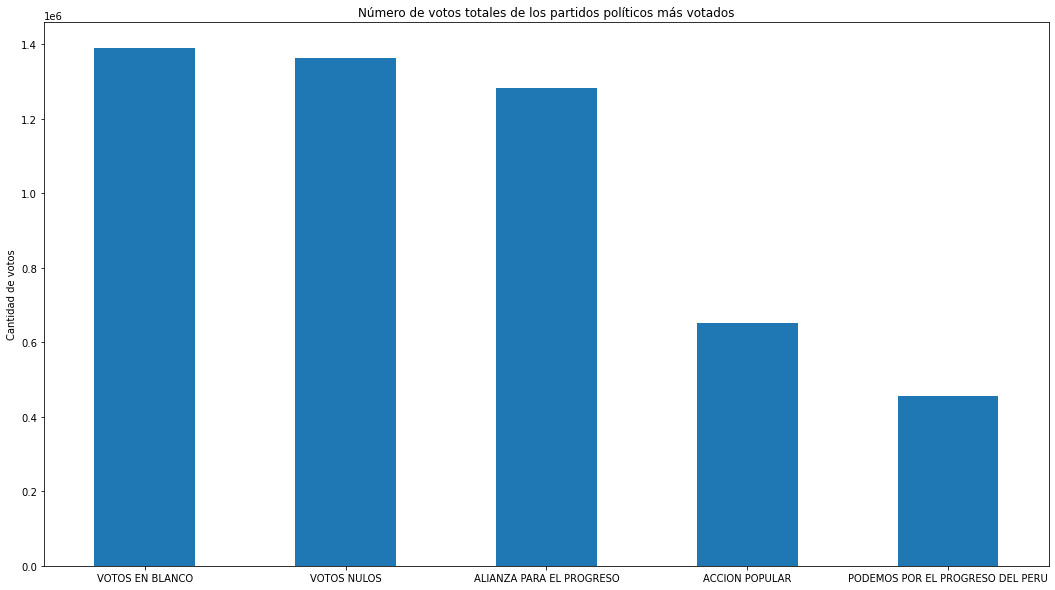

In [85]:

ax = rpregion.sort_values(ascending= False).head(5).plot.bar(figsize=(18,10),
                                                             title="Número de votos totales de los partidos políticos más votados",
                                                             x='Partidos', y='Votos',
                                                             ylabel="Cantidad de votos",
                                                             xlabel="",
                                                             rot=0)



In [86]:
Partidos = ["ALIANZA PARA EL PROGRESO",
           "FUERZA POPULAR",
           "PODEMOS POR EL PROGRESO DEL PERU",
           "PARTIDO DEMOCRATICO SOMOS PERU",
           "FUERZA POPULAR"]

In [87]:
ppol.Partido.unique()

array(['SENTIMIENTO AMAZONENSE REGIONAL', 'VOTOS EN BLANCO',
       'ALIANZA PARA EL PROGRESO', 'FUERZA POPULAR',
       'EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD', 'VOTOS NULOS',
       'MOVIMIENTO REGIONAL AMAZONENSE UNIDOS AL CAMPO',
       'MOVIMIENTO INDEPENDIENTE SURGE AMAZONAS',
       'MOVIMIENTO REGIONAL FUERZA AMAZONENSE',
       'MOVIMIENTO POLITICO REGIONAL ENERGIA COMUNAL AMAZONICA',
       'PERU PATRIA SEGURA', 'PARTIDO POPULAR CRISTIANO - PPC',
       'PARTIDO APRISTA PERUANO', 'JUNTOS POR EL PERU',
       'MOVIMIENTO INDEPENDIENTE REGIONAL HORA CERO',
       'RESTAURACION NACIONAL', 'PODEMOS POR EL PROGRESO DEL PERU',
       'MOVIMIENTO INDEPENDIENTE REGIONAL RIO SANTA CAUDALOSO',
       'MOVIMIENTO INDEPENDIENTE REGIONAL ANCASH A LA OBRA',
       'MOVIMIENTO ACCION NACIONALISTA PERUANO',
       'PARTIDO DEMOCRATICO SOMOS PERU', 'MOVIMIENTO REGIONAL EL MAICITO',
       'SIEMPRE UNIDOS', 'VAMOS PERU', 'UNION POR EL PERU',
       'DEMOCRACIA DIRECTA', 'ACCION POPULA

In [88]:
rpregion2 = ppol[ppol["Region_c"]==15]

In [89]:
rpregion2.sort_values("Votos",ascending =False).head(5)

,Region,Electores,% Participación,Votos emitidos,Votos válidos,Partido,Tipo Organización Política,Votos,perc_Votos,Region_c,...,p503,p301a,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal,Empresario,Region_y
212,LIMA,735932,0.830132,610921,484968,PATRIA JOVEN,MOVIMIENTO REGIONAL,84746,0.17475,15,...,0.002364,6.958,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.03073,15
211,LIMA,735932,0.830132,610921,484968,FUERZA REGIONAL,MOVIMIENTO REGIONAL,73851,0.15228,15,...,0.002364,6.958,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.03073,15
214,LIMA,735932,0.830132,610921,484968,VOTOS EN BLANCO,NaN,65803,0.13569,15,...,0.002364,6.958,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.03073,15
219,LIMA,735932,0.830132,610921,484968,MOVIMIENTO REGIONAL UNIDAD CIVICA LIMA,MOVIMIENTO REGIONAL,60325,0.12439,15,...,0.002364,6.958,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.03073,15
213,LIMA,735932,0.830132,610921,484968,VOTOS NULOS,NaN,60150,0.12403,15,...,0.002364,6.958,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.03073,15


In [90]:
os.chdir("/home/jesus/Documentos/Test/RA-FrancoCalle/output")

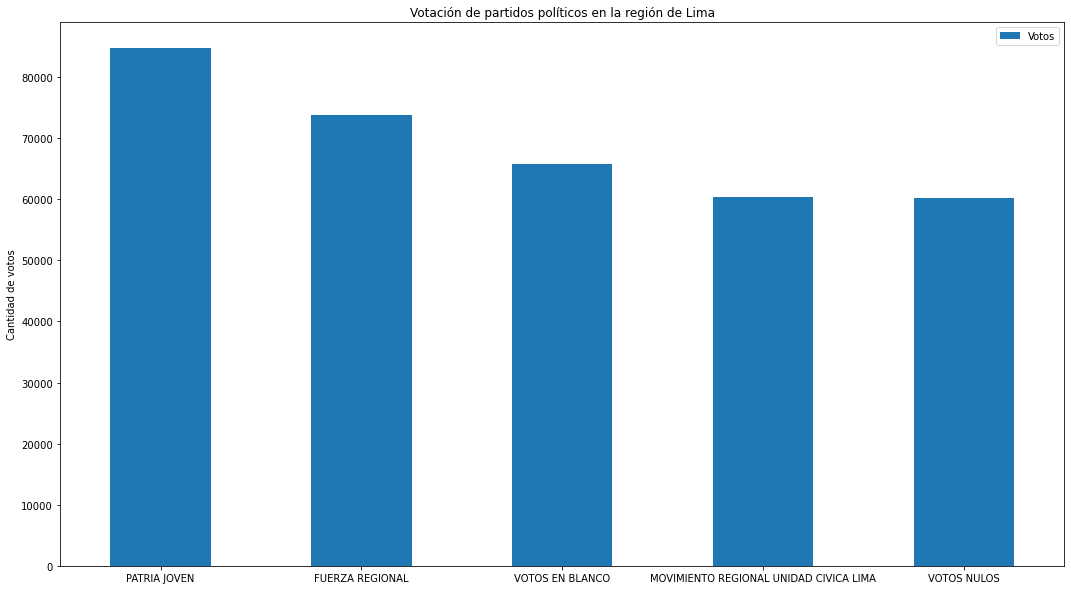

In [91]:
ax = rpregion2.sort_values(by ="Votos",ascending=False).head(5).plot.bar(figsize=(18,10),
                                                             title="Votación de partidos políticos en la región de Lima",
                                                             x='Partido', y='Votos',
                                                             ylabel="Cantidad de votos",
                                                             xlabel="",
                                                             rot=0)

In [92]:
rprregion3 = ppol.groupby("Region").agg('mean')

In [93]:
rprregion3.drop(["p501","p509","p503"], axis=1,inplace=True)

(0.6, 0.9)

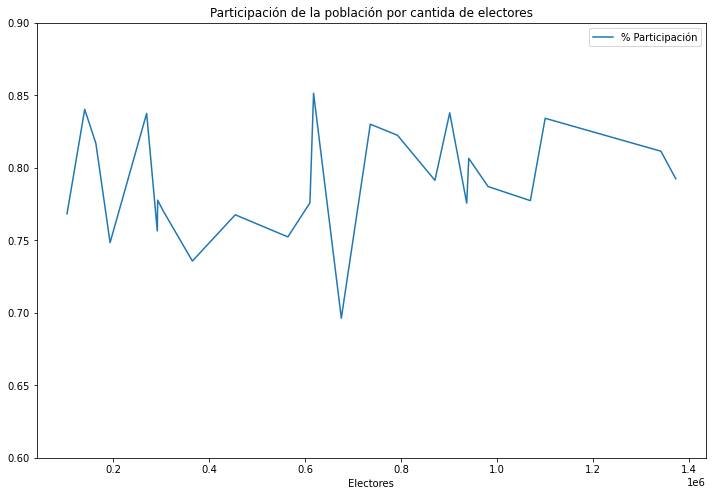

In [219]:
ax = rprregion3.sort_values(by="Electores").plot.line(figsize=(12,8),x="Electores", y = "% Participación",
                                                     title= "Participación de la población por cantidad de electores")
ax.set_ylim(0.6,0.9)

In [95]:
rprregion3["nulos"] = (rprregion3["Votos emitidos"] - rprregion3["Votos válidos"])/rprregion3["Votos emitidos"]

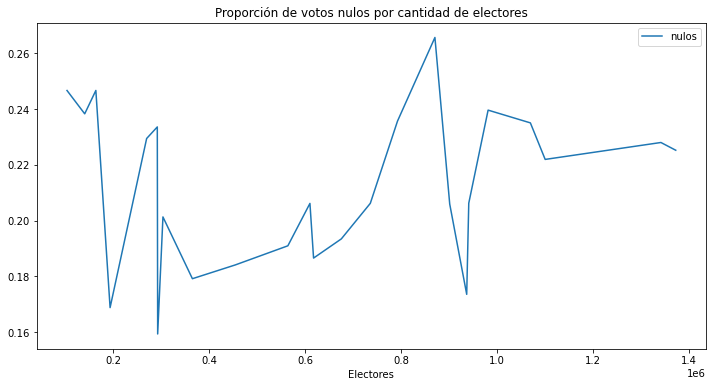

In [217]:
ax = rprregion3.sort_values(by="Electores").plot.line(figsize = (12,6),x="Electores", y = "nulos",
                                                     title="Proporción de votos nulos por cantidad de electores")

In [223]:
rprregion3

,Electores,% Participación,Votos emitidos,Votos válidos,Votos,perc_Votos,Region_c,Miembros,p301a,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal,Empresario,Region_y,nulos
Region,,,,,,,,,,,,,,,,,,
AMAZONAS,291920.0,0.756522,220844.0,169258.0,22084.400000,0.130477,1.0,4.767989,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1.0,0.233586
ANCASH,870629.0,0.791422,689035.0,505969.0,40531.470588,0.080107,2.0,4.643843,5.565988,0.416455,0.210482,1.0,1.119470,3.913978,1.739180,0.030149,2.0,0.265685
APURIMAC,303697.0,0.770633,234039.0,186927.0,16717.071429,0.089430,3.0,3.958835,4.774177,0.721888,0.177711,1.0,1.005522,2.926128,1.356873,0.012550,3.0,0.201300
AREQUIPA,1100447.0,0.834209,918003.0,714267.0,43714.428571,0.061201,4.0,4.242897,6.712629,0.177521,0.237113,1.0,0.852150,4.923530,2.418736,0.029922,4.0,0.221934
AYACUCHO,454455.0,0.767636,348856.0,284640.0,26835.076923,0.094278,5.0,4.133333,4.925306,0.546108,0.205988,1.0,1.083034,2.776066,1.262332,0.023154,5.0,0.184076
CAJAMARCA,1069604.0,0.777407,831518.0,636079.0,83151.800000,0.130725,6.0,3.802728,4.593467,0.663178,0.177609,1.0,0.941960,2.186431,1.097487,0.023787,6.0,0.235039
CALLAO,792637.0,0.822480,651928.0,498284.0,50148.307692,0.100642,7.0,4.617637,6.871887,0.000000,0.241699,1.0,0.942878,5.834452,2.874967,0.021421,7.0,0.235676
CUSCO,981493.0,0.787123,772556.0,587440.0,42919.777778,0.073064,8.0,4.229399,5.413805,0.574721,0.215782,1.0,1.017807,3.118080,1.390517,0.020251,8.0,0.239615
HUANCAVELICA,292708.0,0.777700,227639.0,191375.0,25293.222222,0.132167,9.0,4.259009,4.532594,0.779730,0.168919,1.0,1.201351,2.411978,1.094095,0.030180,9.0,0.159305


In [218]:
ax.figure.savefig("Proporción-nulos.png")

In [216]:
ppol.sample(3)

,Region,Electores,% Participación,Votos emitidos,Votos válidos,Partido,Tipo Organización Política,Votos,perc_Votos,Region_c,...,p503,p301a,rural,Vjoven,Adultos,Menores,Ingreso,Ingreso_personal,Empresario,Region_y
6,AMAZONAS,291920,0.756522,220844,169258,FUERZA POPULAR,PARTIDO POLÍTICO,7903,0.04669,1,...,0.007397,5.069459,0.634163,0.222596,1.0,1.339946,3.022951,1.351536,0.051782,1
216,LIMA,735932,0.830132,610921,484968,FUERZA POPULAR,PARTIDO POLÍTICO,34554,0.07125,15,...,0.002364,6.958000,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.030730,15
215,LIMA,735932,0.830132,610921,484968,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,PARTIDO POLÍTICO,5221,0.01077,15,...,0.002364,6.958000,0.092925,0.231415,1.0,0.913189,5.559019,2.746676,0.030730,15


In [98]:
ppol["Votostrad"]= (ppol["Partido"].isin(Partidos) * ppol["Votos"])/ppol["Votos emitidos"]

In [99]:
ppol["Nvotos"] = ((-ppol["Partido"].isin(Partidos))*(-ppol["Partido"].isin(["VOTOS EN BLANCO","VOTOS NULOS"])) * ppol["Votos"] )/ppol["Votos emitidos"]

/home/jesus/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [100]:
ppol.loc[:,"Nulos"]  = 1 - (ppol.loc[:,"Votos válidos"]/ppol.loc[:,"Votos emitidos"])

In [101]:
ppol[["Partido","Nvotos","Votostrad"]].head(5)

,Partido,Nvotos,Votostrad
0,SENTIMIENTO AMAZONENSE REGIONAL,0.190931,0.000000
1,VOTOS EN BLANCO,0.000000,0.000000
2,ALIANZA PARA EL PROGRESO,0.000000,0.030166
3,FUERZA POPULAR,0.000000,0.035785
4,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",0.039489,0.000000


In [102]:
R2 =ppol.groupby("Region").agg({'Votostrad' :'sum','Nvotos':'sum',"Electores":'mean','Nulos':'mean' })

In [103]:
R2["Total"] = R2["Votostrad"] + R2["Nvotos"] + R2["Nulos"]

In [214]:
R2.sample(3)

,Votostrad,Nvotos,Electores,Nulos,Total
Region,,,,,
JUNIN,0.049612,0.776865,936888,0.173522,1.0
PIURA,0.175026,0.596973,1341718,0.228001,1.0
PASCO,0.414739,0.416499,193519,0.168762,1.0


In [105]:
print(R2[["Votostrad","Nvotos","Nulos","Total"]].to_latex(float_format="%.3f"))

\begin{tabular}{lrrrr}
\toprule
{} &  Votostrad &  Nvotos &  Nulos &  Total \\
Region        &            &         &        &        \\
\midrule
AMAZONAS      &      0.066 &   0.700 &  0.234 &  1.000 \\
ANCASH        &      0.244 &   0.490 &  0.266 &  1.000 \\
APURIMAC      &      0.235 &   0.563 &  0.201 &  1.000 \\
AREQUIPA      &      0.035 &   0.743 &  0.222 &  1.000 \\
AYACUCHO      &      0.041 &   0.775 &  0.184 &  1.000 \\
CAJAMARCA     &      0.271 &   0.494 &  0.235 &  1.000 \\
CALLAO        &      0.219 &   0.546 &  0.236 &  1.000 \\
CUSCO         &      0.105 &   0.656 &  0.240 &  1.000 \\
HUANCAVELICA  &      0.040 &   0.801 &  0.159 &  1.000 \\
HUANUCO       &      0.194 &   0.605 &  0.191 &  0.990 \\
ICA           &      0.146 &   0.668 &  0.187 &  1.000 \\
JUNIN         &      0.050 &   0.777 &  0.174 &  1.000 \\
LA LIBERTAD   &      0.370 &   0.405 &  0.225 &  1.000 \\
LAMBAYEQUE    &      0.573 &   0.220 &  0.206 &  1.000 \\
LIMA          &      0.227 &   0.567 &  0.

In [106]:
Porc_votos = ppol.groupby("Region").agg("mean")

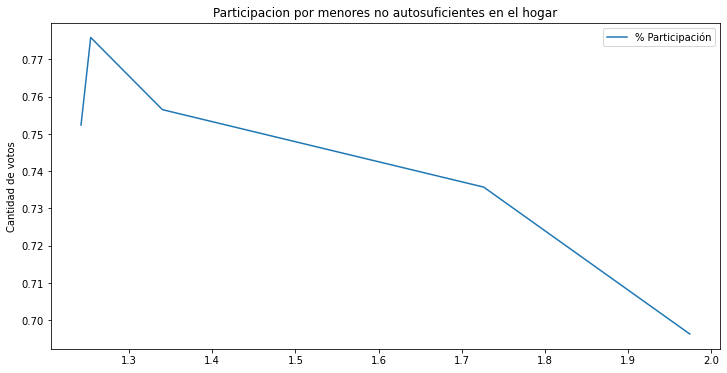

In [115]:
ax = Porc_votos.sort_values(by ="Menores",ascending=False).head(5).plot.line(figsize=(12,6),
                                                             title="Participacion por menores no autosuficientes en el hogar",
                                                             x='Menores', y='% Participación',
                                                             ylabel="Cantidad de votos",
                                                             xlabel="",
                                                             rot=0)

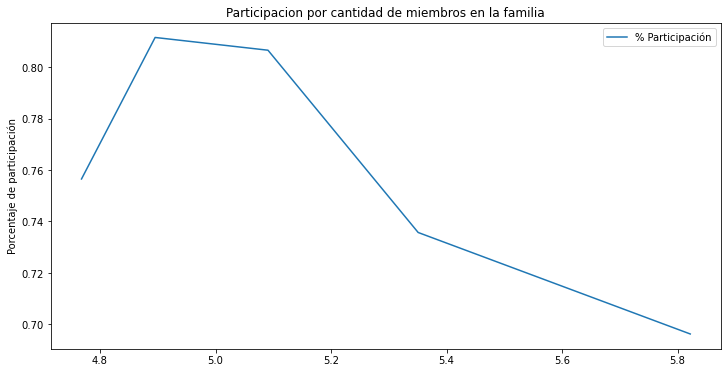

In [109]:
ax = Porc_votos.sort_values(by ="Miembros",ascending=False).head(5).plot.line(figsize=(12,6),
                                                             title="Participacion por cantidad de miembros en la familia",
                                                             x='Miembros', y='% Participación',
                                                             ylabel="Porcentaje de participación",
                                                             legend = "Porcentaje de participacion",
                                                             xlabel="",
                                                             rot=0)

In [110]:
ax.figure.savefig("Miembros.pdf")